# Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not


Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [1]:
!pip install category_encoders
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import category_encoders as ce
%matplotlib inline

In [4]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
#EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [7]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [13]:

encoder=ce.OrdinalEncoder(cols=['Undergrad', 'Marital.Status', 'Urban'])
data1=encoder.fit_transform(df)
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,1,1,68833,50047,10,1
1,2,2,33700,134075,18,1
2,1,3,36925,160205,30,1
3,2,1,50190,193264,15,1
4,1,3,81002,27533,28,2
...,...,...,...,...,...,...
595,2,2,76340,39492,7,1
596,2,2,69967,55369,2,1
597,1,2,47334,154058,0,1
598,2,3,98592,180083,17,2


In [16]:
tax_val = []
for value in df["Taxable.Income"]:
    if value<=30000:
        tax_val.append("Risky")
    else:
        tax_val.append("Good")
        
data1["tax_val"]= tax_val


In [17]:
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_val
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good
...,...,...,...,...,...,...,...
595,2,2,76340,39492,7,1,Good
596,2,2,69967,55369,2,1,Good
597,1,2,47334,154058,0,1,Good
598,2,3,98592,180083,17,2,Good


In [19]:
x = data1.drop(['tax_val','Taxable.Income'], axis =1)
y = data1['tax_val']
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,1,50047,10,1
1,2,2,134075,18,1
2,1,3,160205,30,1
3,2,1,193264,15,1
4,1,3,27533,28,2
...,...,...,...,...,...
595,2,2,39492,7,1
596,2,2,55369,2,1
597,1,2,154058,0,1
598,2,3,180083,17,2


In [21]:
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[-1.040833  , -1.16317644, -1.17852072, -0.62914254, -0.99335541],
       [ 0.96076892,  0.04636579,  0.50850002,  0.27636996, -0.99335541],
       [-1.040833  ,  1.25590801,  1.03310911,  1.63463872, -0.99335541],
       ...,
       [-1.040833  ,  0.04636579,  0.90969648, -1.76103318, -0.99335541],
       [ 0.96076892,  1.25590801,  1.43219749,  0.1631809 ,  1.00668904],
       [-1.040833  ,  0.04636579,  0.9915901 ,  0.04999184,  1.00668904]])

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [38]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=2)
model.fit(x_train,y_train)
ypred = model.predict(x_test)
ypred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [33]:
print('Training accuracy: ', model.score(x_train,y_train))
print('Testing Accuracy: ', model.score(x_test,y_test))

Training accuracy:  0.8
Testing Accuracy:  0.7777777777777778


In [40]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

        Good       0.78      1.00      0.88       140
       Risky       0.00      0.00      0.00        40

    accuracy                           0.78       180
   macro avg       0.39      0.50      0.44       180
weighted avg       0.60      0.78      0.68       180



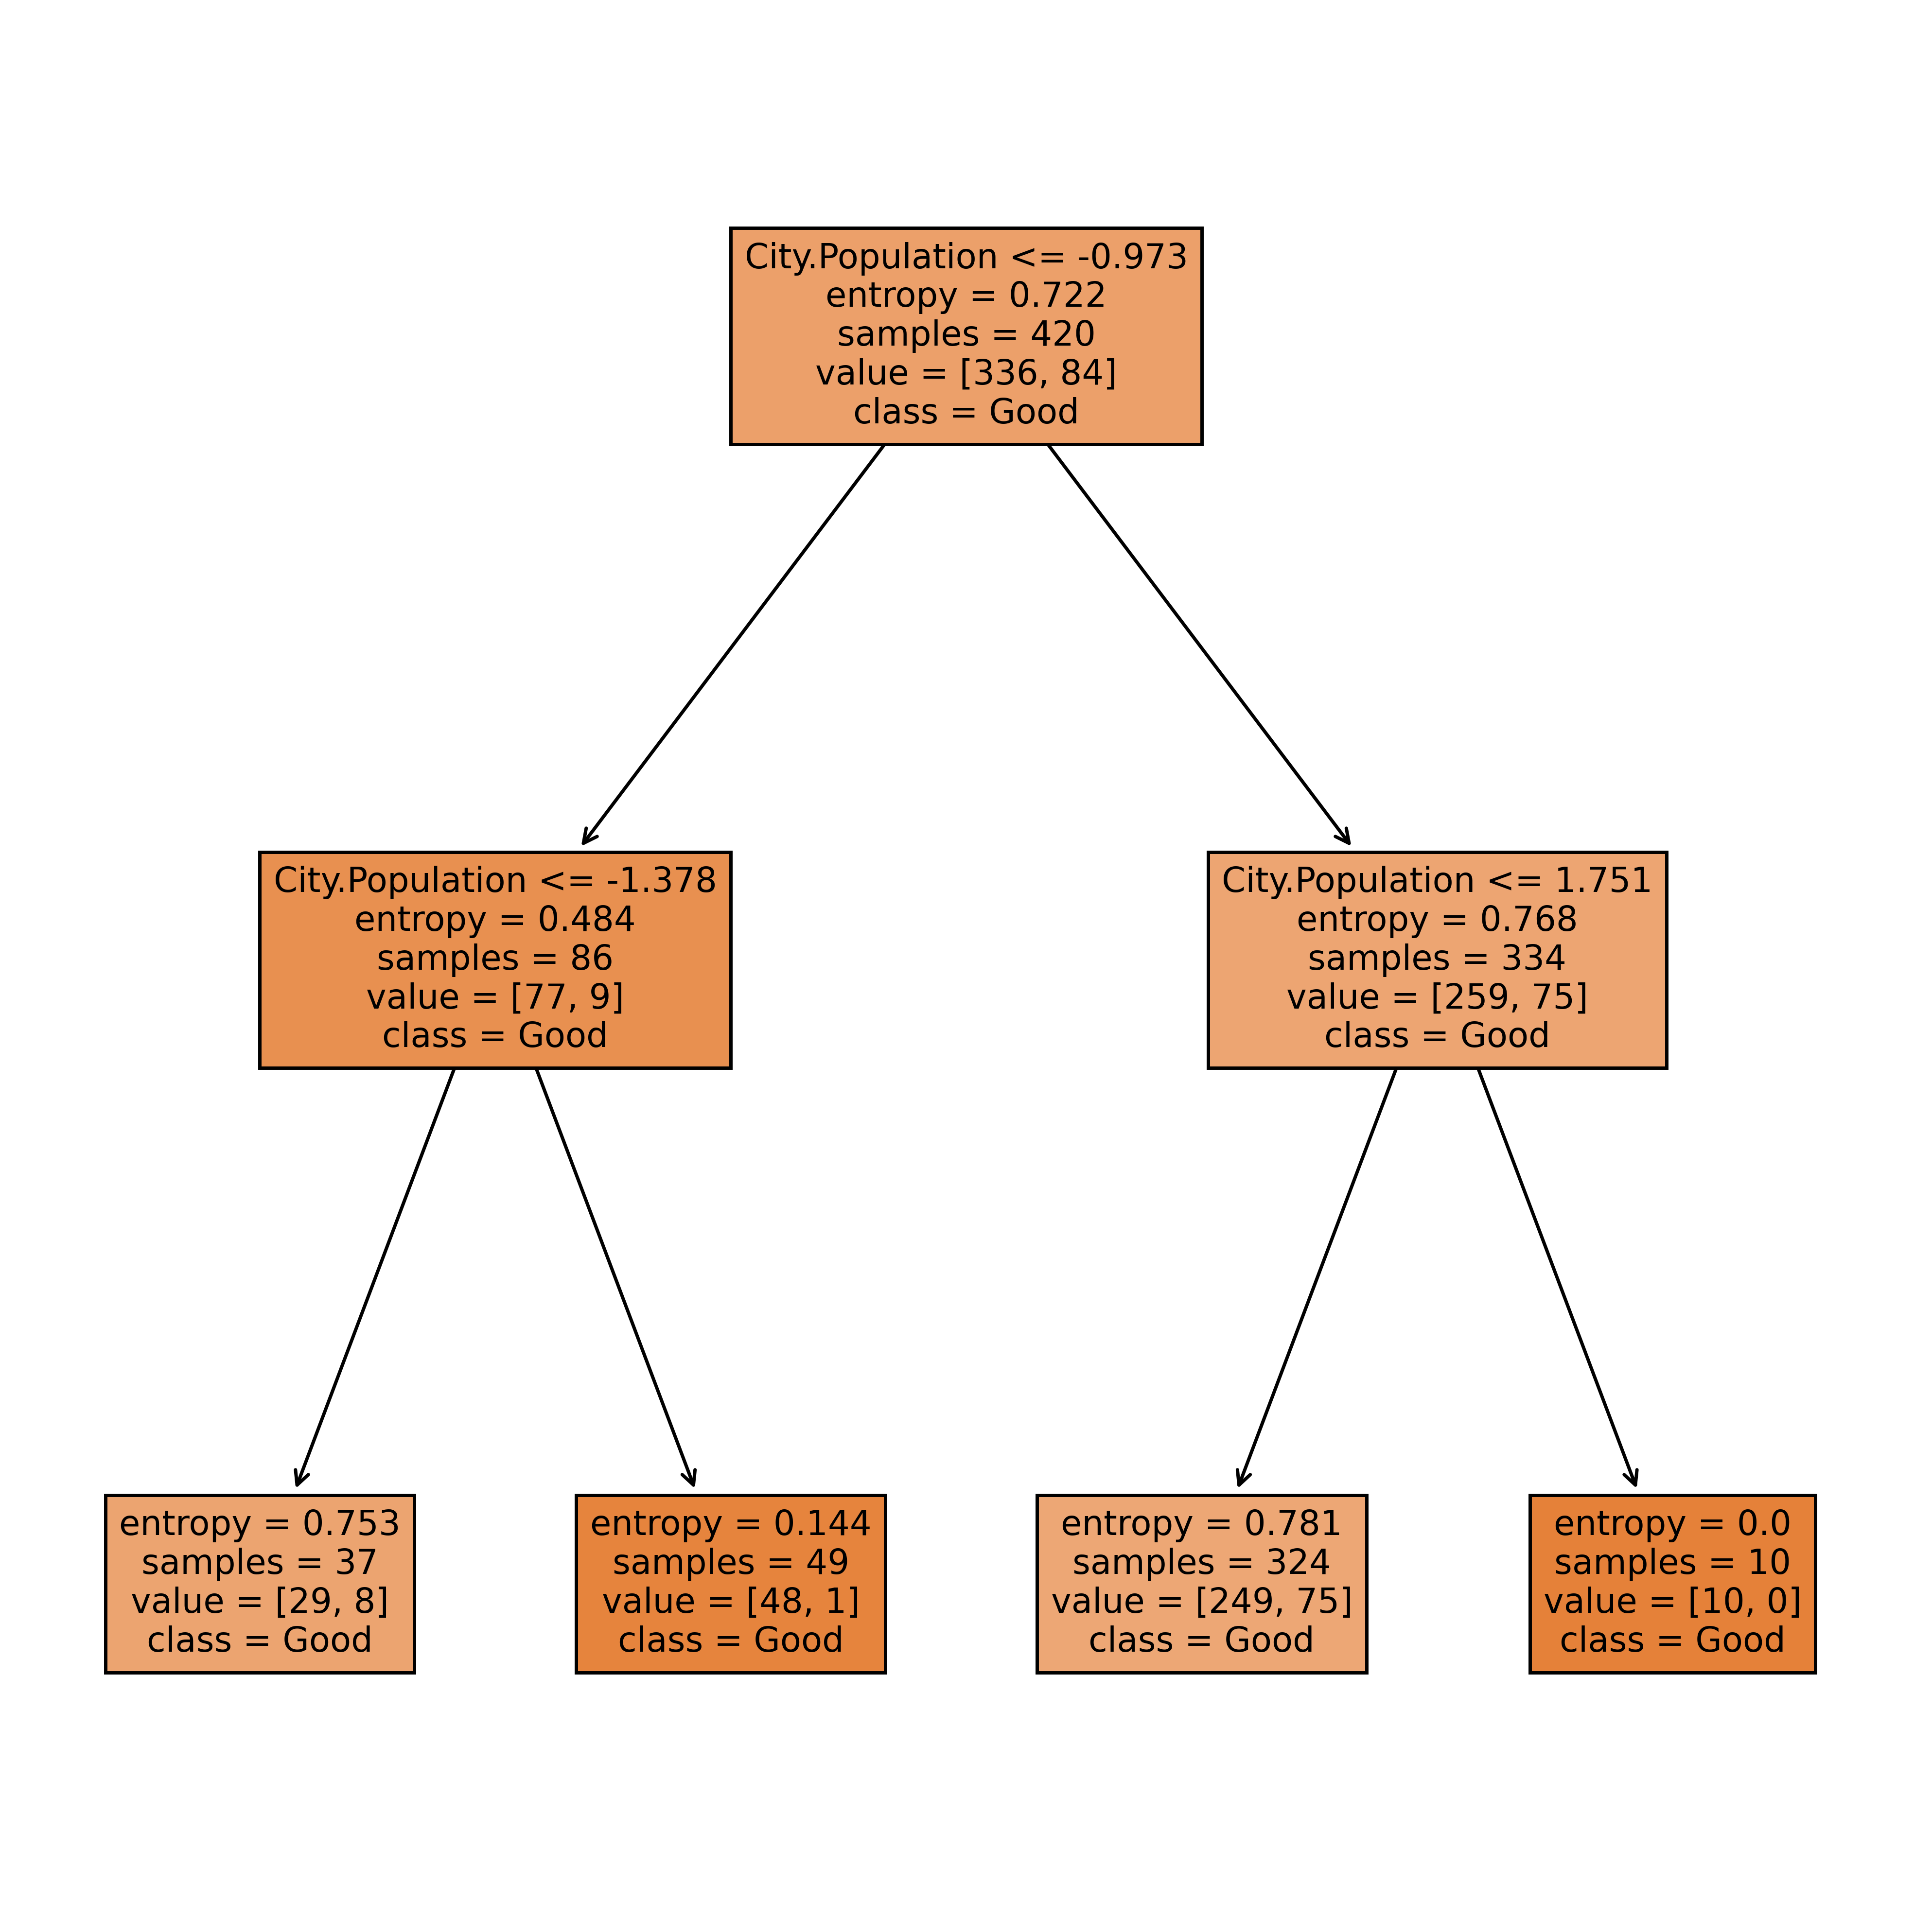

In [32]:
tree.plot_tree(model, feature_names=['Undergrad', 'Marital.Status','City.Population','Work.Experience', 'Urban'],
              class_names=['Good', 'Risky'],
              filled=True)
plt.show()

# Building Decision Tree Classifier using Gini Criteria

In [45]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=2)
model_gini.fit(x_train,y_train)
ypreds = model.predict(x_test)
ypreds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [42]:
print('Training accuracy: ', model.score(x_train,y_train))
print('Testing Accuracy: ', model.score(x_test,y_test))

Training accuracy:  0.8
Testing Accuracy:  0.7777777777777778


In [43]:
print(classification_report(y_test,ypreds))

              precision    recall  f1-score   support

        Good       0.78      1.00      0.88       140
       Risky       0.00      0.00      0.00        40

    accuracy                           0.78       180
   macro avg       0.39      0.50      0.44       180
weighted avg       0.60      0.78      0.68       180



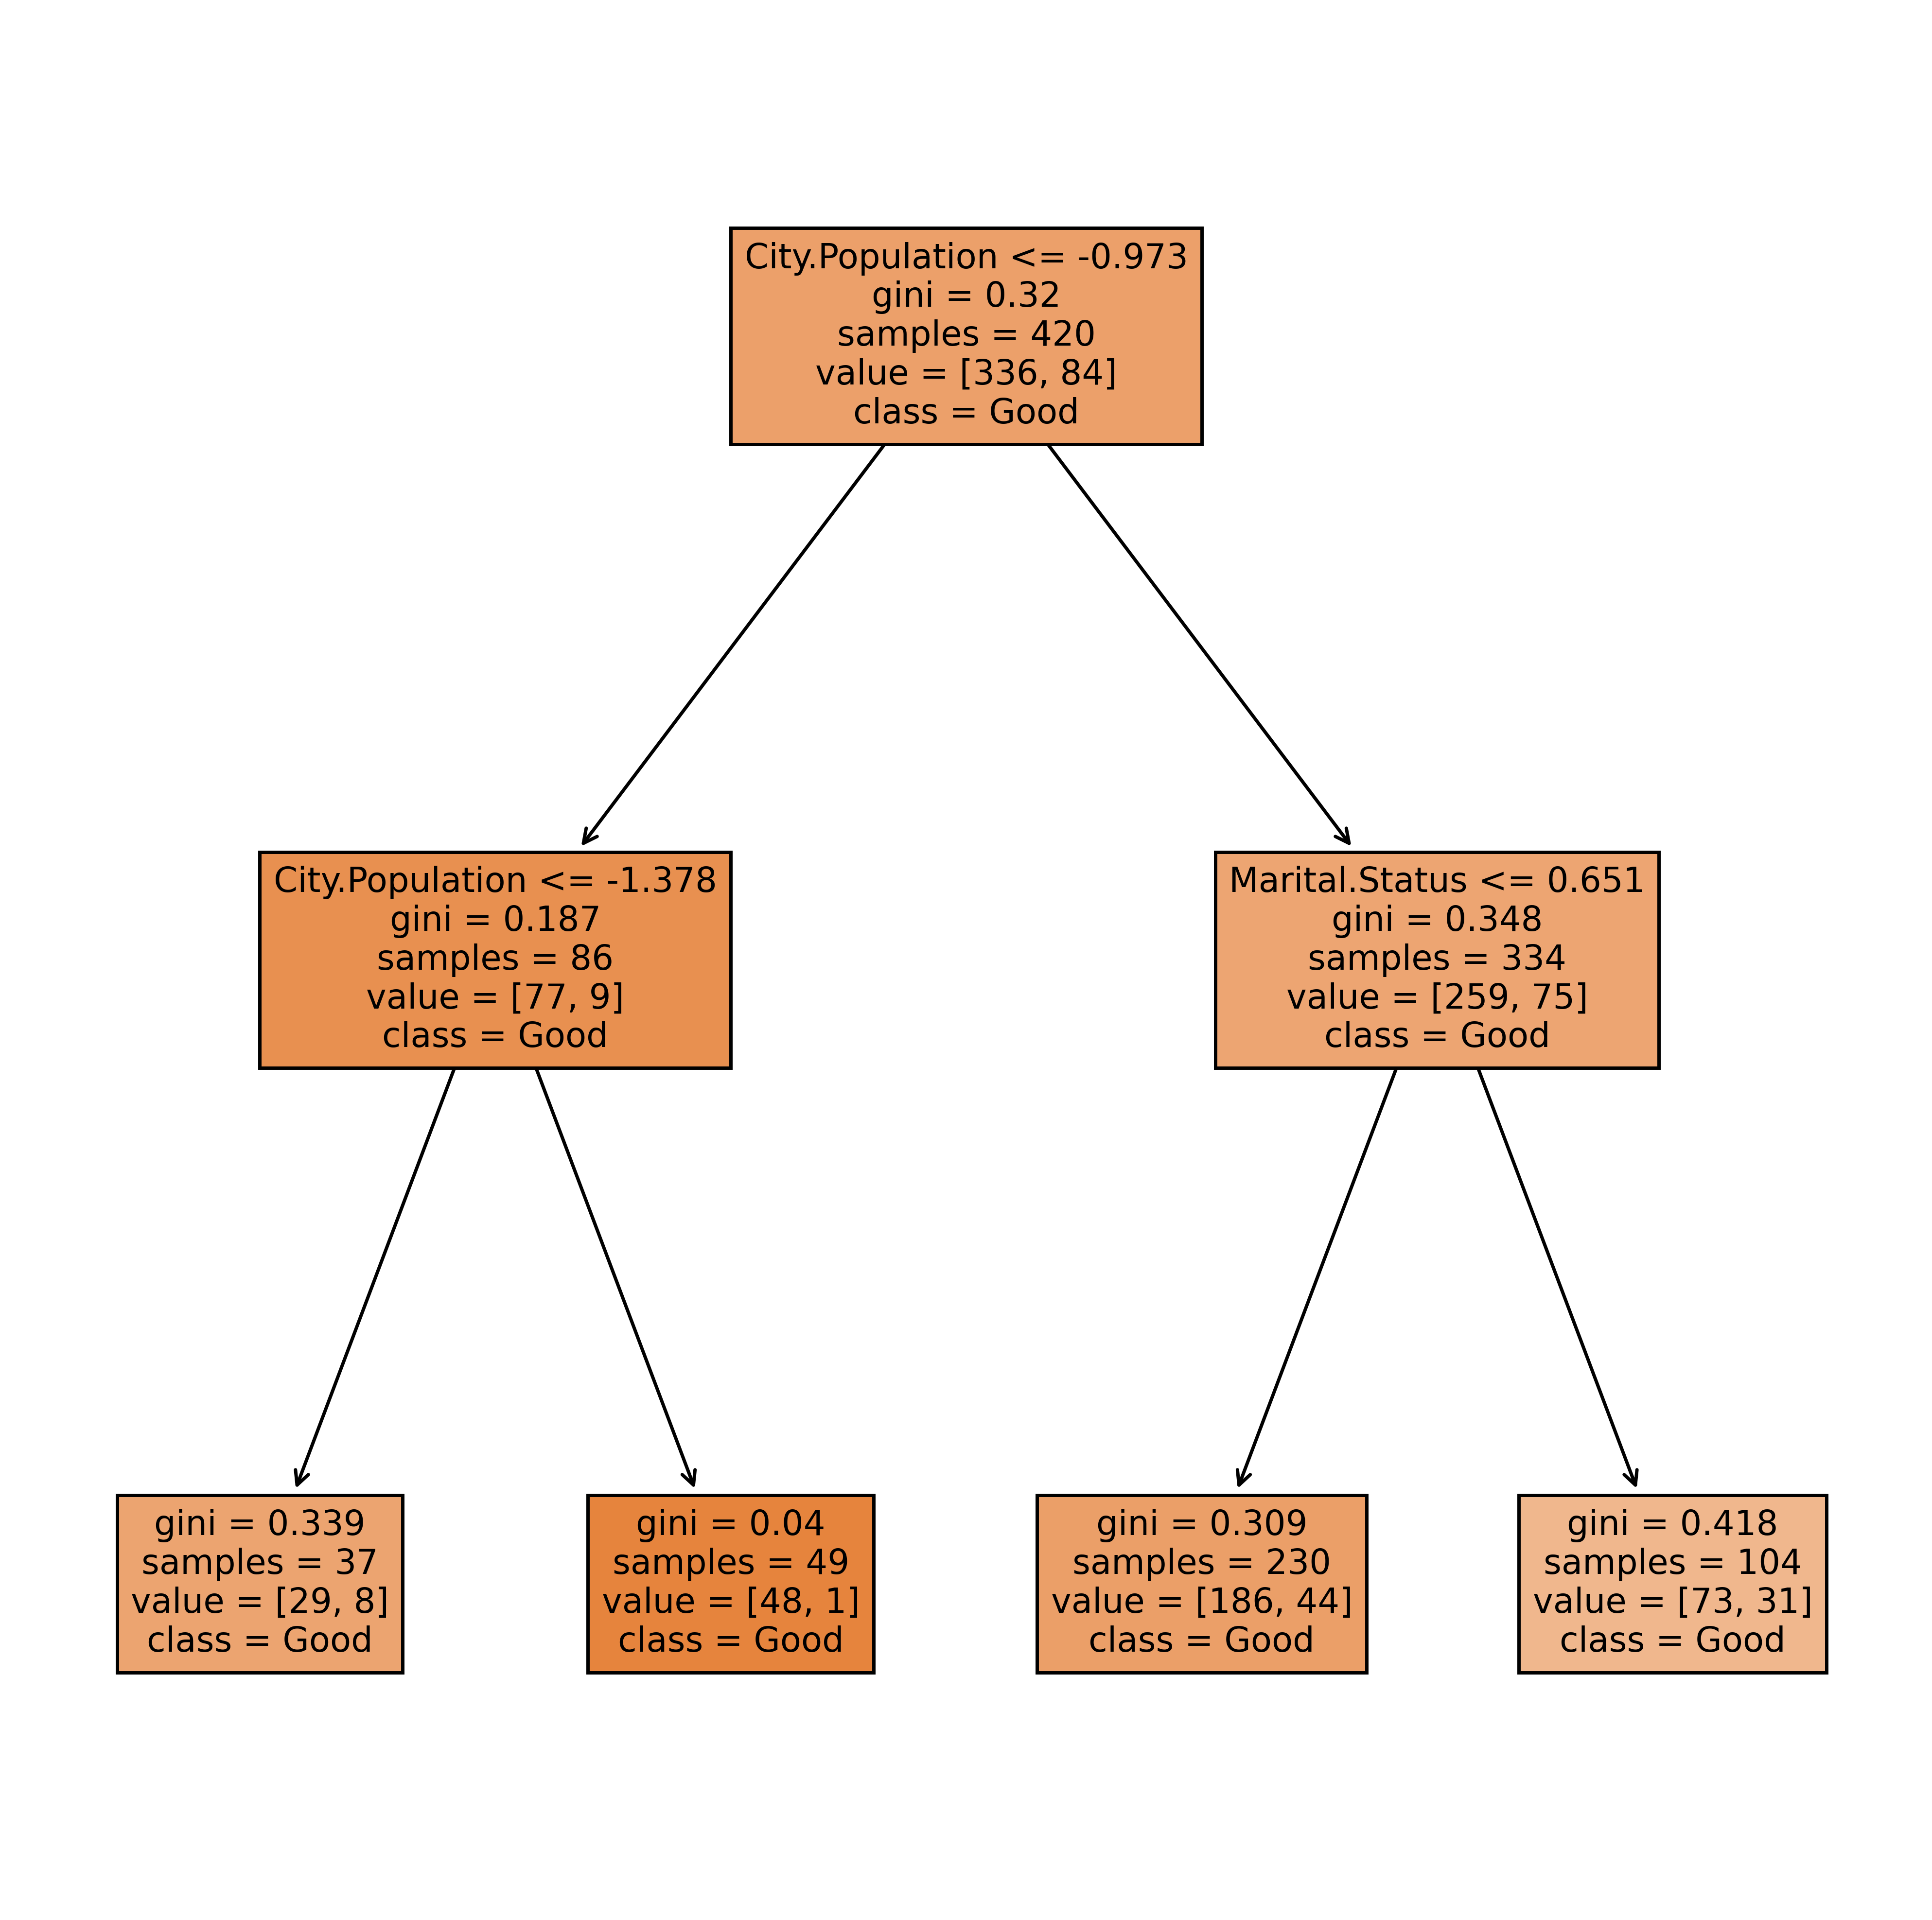

In [46]:
tree.plot_tree(model_gini, feature_names=['Undergrad', 'Marital.Status','City.Population','Work.Experience', 'Urban'],
              class_names=['Good', 'Risky'],
              filled=True)
plt.show()